# Part 0
(**7 points total**)

The goal of this section is to familiarize yourself with the Python [TensorFlow API](https://www.tensorflow.org/api_docs/python/index.html).

This part of the assignment is (very) similar to the first week's [TensorFlow notebook](https://github.com/datasci-w266/main/blob/master/week1/TensorFlow%20Tutorial.ipynb).  James went through it in detail in a [recorded](http://learn.datascience.berkeley.edu/local/adobecp/launch.php?cpurl=p3g4ab3qg61&recording=y&livesessionid=15968) office hour.  You may want to review those before continuing.  If you understood all that, this part should go very quickly.

Before we do anything, let's import all the code we're going to need for this part of the assignment.

In [11]:
import tensorflow as tf
import graph
import graph_test
from matplotlib import pyplot as plt
import unittest

%matplotlib inline

reload(graph)
reload(graph_test)

<module 'graph_test' from 'graph_test.pyc'>

## Simple Adder (2 points)

Open graph.py.  This file contains a number of skeleton classes that we will implement through the course of this notebook.

Implement the methods of the AddTwo class.  In particular:
- `__init__` should construct a graph with two placeholders (the numbers to add)
- `Add` should execute the graph with its two arguments and return the result.  It should not reconstruct the graph each time.

When you are done, execute the next cell to test it.

In [2]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestAdder.test_adder', graph_test))

test_adder (graph_test.TestAdder) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.123s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

If you didn't already, make sure that your adder can handle parameters of any dimension.

In [3]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestAdder.test_vector_adder', graph_test))

test_vector_adder (graph_test.TestAdder) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Affine & Fully Connected Layers

In this section, you don't need to create the graph and session (but we wanted you to do it once so that you know how!).  Instead, you will simply implement functions that construct parts of a larger graph.

You will first build an affine layer: $z = xW + b$ and then a stack of fully connected layers $h = f(xW + b)$.

### Affine (1 point)
In particular, your function will accept a TensorFlow Op that represents the value of $x$ and should return value $z$ of desired dimension.  You must construct whatever variables you need.

Implement affine_layer(...).

Hints:
- use `tf.get_variable()` to create variables.
- `W` should be randomly initialized: xavier_initialization
- `b` should be initialized to a vector of 0s
- `a * b` is a element-wise product.  Look for the function that performs matrix products!

In [4]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestLayer.test_affine', graph_test))

test_affine (graph_test.TestLayer) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.159s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### FC Layers (1 point)
Next, we'll build a fully-connected layer, which we can use to build a network of arbitrary depth.

- Implement the `fully_connected_layers()` function.

*Hint:* Reuse the `affine_layer()` function you already wrote!

In [5]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestLayer.test_fully_connected_layers', graph_test))

test_fully_connected_layers (graph_test.TestLayer) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.095s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

# Training a Neural Network (3 points)

Let's put it all together, and build a simple neural network that fits some training data.

- Implement the `train_nn()` function.

**Note:** you will need to do all the work (creating the graph and the session and a training op).

To get the tests to pass, please use tf.train.GradientDescentOptimizer as your optimizer.

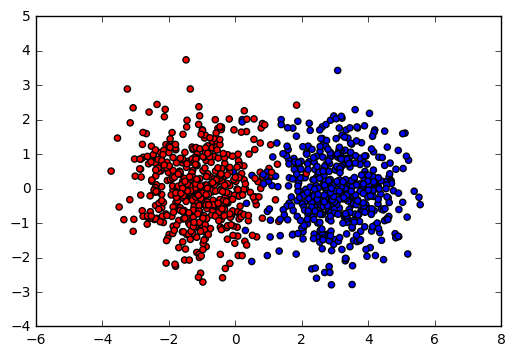

In [6]:
reload(graph_test)
X_train, y_train, X_test, y_test = graph_test.generate_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')

In [7]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestNN.test_train_nn', graph_test))

test_train_nn (graph_test.TestNN) ... 

Initial loss: 0.690809
Variable:  W:0 (2, 1000)
dJ/dVar:  [array([[  9.23359403e-05,  -1.06773790e-04,  -8.24057279e-05, ...,
         -4.19414282e-05,   1.33475914e-05,  -8.63360692e-05],
       [  2.47671301e-06,  -1.48404106e-05,   1.42167883e-05, ...,
          7.40208816e-06,  -5.44845943e-06,   1.30437511e-05]], dtype=float32)]
Variable:  b:0 (1000,)
dJ/dVar:  [array([  1.43415336e-05,  -1.66556638e-05,  -1.26759414e-05,
         1.59939627e-05,   1.61733496e-05,  -1.01511332e-05,
        -1.25308543e-05,   3.03819661e-06,  -3.24347241e-07,
        -5.62287232e-06,  -1.72411164e-05,   4.74290073e-06,
         4.42353485e-06,  -7.05583261e-06,  -1.77216807e-05,
         1.35843072e-06,  -1.74319121e-05,  -7.28058330e-06,
        -9.85183578e-06,  -1.39802833e-05,   1.64698158e-05,
        -1.69057839e-05,   9.84372946e-06,  -1.22916035e-05,
        -1.07178939e-05,  -1.56065362e-05,  -8.24936706e-06,
        -1.61502503e-05,   7.84936492e-06,  -1.46913299e-05,
         4.79059963e

ok

----------------------------------------------------------------------
Ran 1 test in 111.158s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

That was fairly straightforward...  the data is clearly linearly separable.

### Tuning Parameters

Let's try something a bit harder!

Here, we'll train a neural network with a couple of hidden layers before the final sigmoid.  This lets the network learn non-linear decision boundaries.

Try playing around with the hyperparameters to get a feel for what happens if you set the learning rate too big (or too small), or if you don't give the network enough capacity (i.e. hidden layers and width).

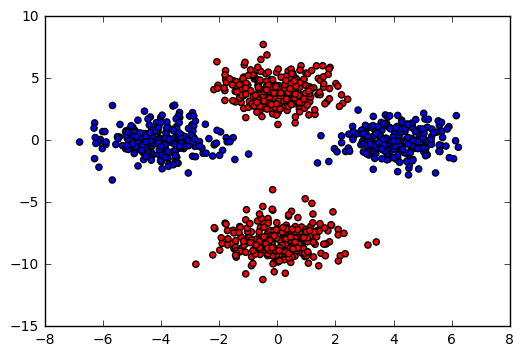

In [8]:
reload(graph_test)
X_train, y_train, X_test, y_test = graph_test.generate_non_linear_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')

In [9]:
hidden_layers = [10, 10]
batch_size = 50
epochs = 2000
learning_rate = 0.001
predictions = graph.train_nn(X_train, y_train, X_test, hidden_layers, batch_size, epochs, learning_rate)

Initial loss: 0.688471
Variable:  mylayer_0/W:0 (2, 10)
dJ/dVar:  [array([[  1.39346498e-03,  -1.62834232e-03,  -1.88375614e-03,
          3.61516170e-04,   9.87731386e-04,  -5.44222654e-04,
         -4.87657380e-04,   3.01356165e-04,   3.14639765e-04,
          8.45817733e-04],
       [ -1.83907244e-03,   2.21907557e-03,   2.76416773e-03,
         -2.63004826e-04,  -1.71548314e-03,   8.17514810e-05,
         -6.05151057e-04,  -3.11677111e-04,  -1.37036457e-03,
          1.53531233e-04]], dtype=float32)]
Variable:  mylayer_0/b:0 (10,)
dJ/dVar:  [array([-0.00071259, -0.00064095, -0.00075388, -0.00013745, -0.00060261,
       -0.00012963, -0.00024941, -0.00014181, -0.00041742,  0.00024853], dtype=float32)]
Variable:  mylayer_1/W:0 (10, 10)
dJ/dVar:  [array([[  0.00000000e+00,  -2.11857306e-03,  -7.09516971e-05,
         -1.54438058e-05,   0.00000000e+00,  -4.63964825e-04,
         -2.01973459e-03,  -7.16444629e-05,  -5.58516476e-05,
         -2.83980335e-04],
       [  6.92165401e-08,  -2

ValueError: to_rgba: Invalid rgba arg "[ 0.51005614  0.53402013  0.54684454  0.49147192  0.50684917  0.45114106
  0.53257626  0.60616839  0.53158754  0.49964061  0.52705967  0.35582921
  0.5161556   0.52298349  0.48579484  0.62492388  0.64547306  0.49372703
  0.5400964   0.47201818  0.41055921  0.46018499  0.47013292  0.40577012
  0.43955886  0.58094007  0.56794184  0.39057571  0.36300108  0.49033844
  0.33602104  0.48505786  0.51576209  0.55713695  0.38488588  0.32233161
  0.44939706  0.36803076  0.56082803  0.46696159  0.49029166  0.42496765
  0.59541219  0.4681156   0.47973698  0.33333018  0.41376489  0.46040568
  0.41984555  0.63664204  0.47908604  0.55580497  0.54718637  0.48678854
  0.41928226  0.45203501  0.58281672  0.50768471  0.50902128  0.61992884
  0.50765693  0.3214134   0.49849492  0.38330477  0.46432921  0.41757911
  0.51726443  0.38577682  0.42400217  0.5095191   0.48829129  0.40213344
  0.52576905  0.48013899  0.61832392  0.66339624  0.47085387  0.5530588
  0.46643823  0.52522928  0.59270215  0.46230233  0.56308323  0.58451432
  0.5523262   0.56098896  0.33797923  0.41855094  0.49540454  0.40152034
  0.53148079  0.59778339  0.40727922  0.46394026  0.46305725  0.51099497
  0.5558697   0.4116658   0.43150929  0.50972778  0.59323597  0.48418233
  0.54764783  0.52039587  0.56863034  0.40742481  0.55550492  0.42319676
  0.45787629  0.47361594  0.64369696  0.54268718  0.47744763  0.55899948
  0.52521288  0.58667487  0.57204801  0.59654289  0.40990439  0.55464822
  0.51913697  0.52419734  0.64095026  0.58788007  0.53386205  0.42660192
  0.39677471  0.47719461  0.62089258  0.60287708  0.41902801  0.6066187
  0.3756285   0.53962898  0.5270198   0.60283208  0.50490963  0.43393871
  0.37915236  0.42341867  0.43635887  0.60567486  0.5148952   0.51354086
  0.40497845  0.4365707   0.38310957  0.6068486   0.4193081   0.53305072
  0.44546357  0.5689128   0.39684525  0.38692954  0.38782349  0.5717923
  0.39695293  0.34402251  0.49626246  0.52231455  0.65028572  0.48407081
  0.41512817  0.52500194  0.49996895  0.4567965   0.55797791  0.42320129
  0.44934124  0.50854111  0.56672162  0.48112652  0.38515612  0.35210887
  0.35676947  0.51469517  0.52368724  0.46830264  0.5753659   0.42764878
  0.49650389  0.64456862  0.40442571  0.4160445   0.64710826  0.44667265
  0.53006256  0.42126417  0.61105269  0.39833358  0.42577744  0.50722194
  0.60311818  0.59646666  0.52982831  0.60657907  0.56563085  0.45511466
  0.54925251  0.53802317  0.52427375  0.51411718  0.53394371  0.52510512
  0.50698191  0.61091942  0.34063151  0.49620438  0.3827517   0.53039163
  0.48376015  0.38245544  0.45509481  0.51738322  0.53989977  0.41974568
  0.50128871  0.51416576  0.34021556  0.53821135  0.46923658  0.56632757
  0.43521178  0.58484656  0.56945127  0.6265406   0.60228616  0.66740745
  0.56214058  0.55267048  0.62816805  0.45622534  0.36630344  0.50445592
  0.50949365  0.36818692  0.56394982  0.41065544  0.48589128  0.51588577
  0.50687957  0.50034368  0.54073131  0.45936075  0.38807207  0.44415063
  0.5936833   0.57253647  0.51885742  0.59114534  0.42650345  0.5081358
  0.33271551  0.51978517  0.6108343   0.49814036  0.49753609  0.41846862
  0.44131908  0.37048021  0.50949878  0.42102984  0.35969043  0.66757226
  0.48728096  0.46073821  0.46377555  0.55774939  0.51370245  0.54961461
  0.50216466  0.39125547  0.49859869  0.49067986  0.55283463  0.4812744
  0.42668855  0.39785576  0.45505404  0.49151886  0.38680071  0.57954836
  0.55257422  0.45363405  0.64255738  0.43171442  0.55908602  0.44789597
  0.56714159  0.35159987  0.52673846  0.41800886  0.60935092  0.66585469
  0.52986139  0.44047409  0.45545927  0.47517616  0.54156953  0.47249994
  0.34437373  0.50540996  0.55046093  0.54251266  0.60025698  0.52197647
  0.41914028  0.51830542  0.4390429   0.52863187  0.53234386  0.52397412
  0.38240293  0.41831896  0.38424459  0.44652197  0.60520673  0.57952011
  0.5490343   0.40876761  0.44734749  0.61984557  0.67324227  0.38299257
  0.59561574  0.61745673  0.41200981  0.46222982  0.35919479  0.62749708
  0.60340869  0.50092226  0.46328178  0.49082306  0.46240595  0.61199957
  0.5855006   0.34057868  0.44954881  0.43941048  0.48014602  0.46116164
  0.37963742  0.35122308  0.61386794  0.48877609  0.6130029   0.62146896
  0.56658125  0.44067976  0.37753582  0.55056518  0.43221757  0.37799504
  0.5404585   0.35616302  0.52367419  0.48992559  0.37926394  0.46326235
  0.55848974  0.42251846  0.52152866  0.36482301  0.48769569  0.59846818
  0.37588751  0.5079214   0.3701098   0.57289004  0.50118625  0.45600539
  0.54389554  0.60565048  0.52695346  0.46034747  0.52085441  0.51982588
  0.57790679  0.43263012  0.53397554  0.51815534  0.51805186  0.46442705
  0.62810701  0.50794262  0.53730989  0.3963941   0.48693645  0.4870432
  0.43338108  0.43182039  0.40780208  0.41253781  0.60292703  0.64501178
  0.5046289   0.56402564  0.38043728  0.51808107  0.60784471  0.59419292
  0.43062812  0.42363667  0.64943951  0.50256103  0.56967407  0.46113494
  0.45217013  0.38051826  0.47240341  0.4854022   0.54483622  0.50144207
  0.57646781  0.61521369  0.52640694  0.52568448  0.48791096  0.43699256
  0.6372723   0.52453887  0.50519937  0.40099847  0.47933665  0.52483666
  0.52677816  0.59217429  0.51112455  0.52672178  0.50789261  0.61378729
  0.4186798   0.51108491  0.62296921  0.55995935  0.45347872  0.55933684
  0.60393661  0.58564496  0.5987128   0.49447978  0.51616681  0.44210202
  0.58493012  0.46158513  0.49647167  0.38255885  0.52333134  0.3719531
  0.47044984  0.63329434  0.56315392  0.56504297  0.51664048  0.37151033
  0.56784672  0.53067708  0.63279414  0.42505863  0.49281701  0.44522443
  0.39973348  0.48519346  0.48134547  0.4433383   0.59768546  0.58293706
  0.52012563  0.62546921  0.49090332  0.60274816  0.48967376  0.4767344
  0.54508793  0.50494087  0.43281814  0.58865398  0.62521386  0.41377228
  0.54628265  0.47467819  0.44605535  0.51174927  0.44341558  0.35438353
  0.44813967  0.66136181  0.62871385  0.5972451   0.48177797  0.39346021
  0.60230148  0.42428324  0.55531144  0.54023993  0.48597485  0.57421231
  0.51773894  0.63331306  0.3912949   0.56979251  0.51684821  0.38937631
  0.4256945   0.53506893  0.5693152   0.57699609  0.54963726  0.38138044
  0.46907222  0.50101733  0.60241741  0.44230053  0.35453111  0.49619341
  0.52167207  0.32856247  0.5388906   0.53962046  0.43505269  0.62717366
  0.48777249  0.50692159  0.39765924  0.4180885   0.39861748  0.53209144
  0.49855128  0.44284934  0.55770928  0.67764759  0.63870078  0.57690483
  0.57998008  0.40344954  0.60566604  0.62188327  0.39905345  0.5126639
  0.57299072  0.51442838  0.47660759  0.54015124  0.55449408  0.54540342
  0.41401762  0.37969425  0.39824358  0.56323797  0.4628123   0.53346795
  0.37200183  0.35799754  0.64167988  0.35826468  0.46351197  0.42451781
  0.4686771   0.44968724  0.64996296  0.57332146  0.41618985  0.39896554
  0.650038    0.55080795  0.38931164  0.53798771  0.63959605  0.56077731
  0.51431727  0.57983691  0.4806715   0.4591102   0.49026507  0.52505064
  0.49378499  0.3374016   0.46084794  0.51342571  0.44913602  0.58112019
  0.3858085   0.41740504  0.54435569  0.39322606  0.45373797  0.43050164
  0.57774335  0.5337863   0.5675447   0.53437406  0.44558728  0.46308404
  0.43251136  0.57850707  0.41293958  0.59424329  0.5790959   0.48285505
  0.46498293  0.48639762  0.43920323  0.44184482  0.53507096  0.51705146
  0.42157683  0.48153889  0.57501692  0.556315    0.57450074  0.64048702
  0.49864528  0.42170784  0.33062854  0.408952    0.64296466  0.52545065
  0.52413166  0.53818387  0.41862276  0.42276067  0.38644123  0.56699532
  0.46067354  0.41397685  0.46895328  0.3381637   0.35804704  0.45832676
  0.62581724  0.46319726  0.52990836  0.48912823  0.50187528  0.44551173
  0.54195219  0.47867566  0.45089072  0.53206271  0.42449978  0.54336339
  0.57268721  0.38470092  0.42429829  0.43950805  0.61687863  0.40403154
  0.3901602   0.61695004  0.41846558  0.44542855  0.44225425  0.52830273
  0.48315954  0.45393077  0.62318033  0.42312083  0.68713927  0.38281855
  0.40256834  0.44543365  0.49431124  0.49580699  0.60834241  0.42403457
  0.68304431  0.58945215  0.51523024  0.56986767  0.51011163  0.5222578
  0.64315724  0.4881123   0.52898967  0.56226474  0.52852786  0.62972373
  0.49096763  0.63045746  0.39839071  0.55651242  0.47710949  0.4329226
  0.40533775  0.43575728  0.4765113   0.51248616  0.57928383  0.42942303
  0.6066193   0.62456566  0.53122556  0.5308187   0.37617207  0.49000126
  0.51810277  0.65593374  0.41750777  0.52304435  0.45198742  0.46213266
  0.52977163  0.43782035  0.66505444  0.57473046  0.37926173  0.57545447
  0.51499403  0.63416749  0.62031728  0.3910062   0.47247306  0.39097628
  0.59148967  0.51276129  0.45090017  0.36492565  0.49348816  0.41834775
  0.49985948  0.49961978  0.35078534  0.55730182  0.56709415  0.54918545
  0.60747254  0.35357192  0.52194673  0.4692153   0.4974778   0.46214092
  0.5578171   0.3966974   0.44456467  0.42131874  0.43120745  0.54903013
  0.46820939  0.50513119  0.47061032  0.42522916  0.46056867  0.51431614
  0.47138864  0.421446    0.45100936  0.45283163  0.43084237  0.60275
  0.5574826   0.58141851  0.41892466  0.59641939  0.51292861  0.61371529
  0.54471231  0.65034133  0.62822866  0.58048218  0.35347226  0.59788346
  0.46586928  0.50004095  0.53568566  0.39973733  0.62760919  0.53380162
  0.32032293  0.60495216  0.39091742  0.60081547  0.34603757  0.52534461
  0.6275624   0.43137562  0.46972644  0.57026666  0.37125826  0.38575542
  0.60953587  0.5177241   0.59436077  0.43386015  0.48559573  0.53206515
  0.43874666  0.48881033  0.39011997  0.63437396  0.56628937  0.54363775
  0.4430736   0.45335352  0.53838128  0.45216396  0.45223713  0.54695898
  0.57499105  0.46072835  0.59431541  0.60945666  0.41924775  0.35087022
  0.54968804  0.6538378   0.44140843  0.37384123  0.53354943  0.54203075
  0.34626135  0.57897621  0.42790514  0.60267961  0.42854995  0.414675
  0.40578514  0.49844879  0.61993605  0.49125928  0.61216831  0.53600472
  0.32509622  0.57731473  0.56940782  0.3509922   0.45025387  0.60400593
  0.45456827  0.44297543  0.54765308  0.61002558  0.34288901  0.48381406
  0.63697368  0.54222858  0.47670189  0.54849136  0.57315028  0.59204185
  0.59003794  0.46275592  0.42584887  0.46927691  0.60211515  0.59801978
  0.42231327  0.39118126  0.513026    0.60109925  0.4022994   0.68870324
  0.57234281  0.58421779  0.56452602  0.46425635  0.56132805  0.41586691
  0.59833276  0.39593208  0.63182628  0.36813024  0.42201248  0.44655392
  0.37918466  0.62584096  0.56845194  0.40342522  0.55036104  0.66308832
  0.3571687   0.59874296  0.46106789  0.60248309  0.69418889  0.49620232
  0.53889608  0.4870013   0.5483076   0.55597335  0.62202233  0.37121946
  0.44535851  0.53124297  0.50342852  0.47799054  0.55453861  0.44681582
  0.47013703  0.49401686  0.45326817  0.52263111  0.64734024  0.68948793
  0.4681527   0.38919866  0.44104764  0.51094639  0.38508689  0.51863283
  0.37516814  0.51524377  0.61024928  0.4395234   0.4502317   0.50720471
  0.46612462  0.49715361  0.55813354  0.58962393  0.62436032  0.4665336
  0.42786193  0.55775499  0.55953938  0.6419214   0.36748603  0.52837539
  0.42030922  0.38122579  0.45961228  0.65102565  0.55399096  0.58585751
  0.35142091  0.52505624  0.5667277   0.52791488  0.57383549  0.4845525
  0.55522394  0.52113175  0.63817114  0.54031563  0.44308549  0.66058487
  0.58949095  0.55397922  0.47596526  0.39171132  0.61288685  0.59381521
  0.64544874  0.44688725  0.47521645  0.42739472  0.42779961  0.38465098
  0.39337298  0.55521631  0.32878187  0.3479552   0.43304011  0.62197709
  0.53694719  0.54143065  0.49145314  0.48848033  0.46052563  0.54919547
  0.5658924   0.46382454  0.50051206  0.51571161  0.5394004   0.58922619
  0.47894922  0.35711095  0.54255176  0.35541648  0.45690835  0.43672287
  0.48016769  0.52668858  0.53545845  0.61993867  0.54112327  0.4622525
  0.65460712  0.65117103  0.41276735  0.60215193  0.62094206  0.57277781
  0.56369388  0.4557952   0.5055179   0.58996296  0.45528954  0.51789659
  0.47473031  0.52671909  0.68378097  0.49800706  0.60403532  0.50481021
  0.57946646  0.57581192  0.53565246  0.38228688]"
length of rgba sequence should be either 3 or 4

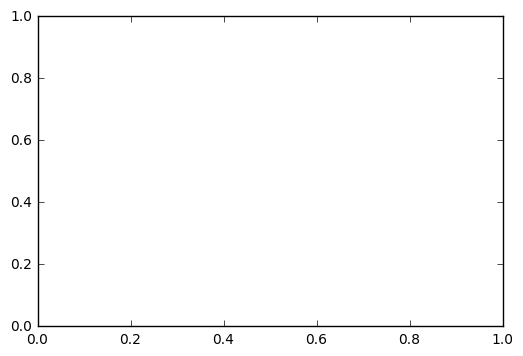

In [16]:
plt.scatter(X_test[:,0], X_test[:,1], c=predictions, cmap='bwr')

That looks pretty good!

Let's compare the predictions vs. the labels and see what we got wrong...

/home/rkatz/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


ValueError: Cannot convert argument type <type 'bool'> to rgba array

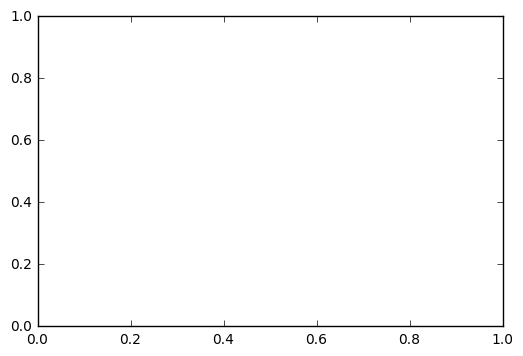

In [17]:
plt.scatter(X_test[:,0], X_test[:,1], c=(predictions==y_test), cmap='bwr')

Only a tiny number of errors (hopefully!).  Good work!

## Congratulations

You have implemented a deep neural network using tensorflow!

One remaining API you may want to take a look at is [tf.nn.embedding_lookup](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#embedding_lookup).  As you might expect from the name, it is what to use to map word ids to word vectors.  Concretely, the first parameter is the embedding matrix (a variable of dimension vocab x wordvec length) and the second are indexes to lookup.